## A1.  

One of the challenges that many telecommunications companies face is customer retention.  Customers commonly change providers for various reasons ranging from affordability to wider service offerings.  In this analysis we will ask "What factors are most responsible for customer churn?".  The independent variables below will be used in the analysis.

<ul>
    <li>Outage_sec_perweek</li>
    <li>Contacts</li>
    <li>Yearly_equip_failure</li>
    <li>Tenure</li>
    <li>MonthlyCharge</li>
    <li>Contract</li>
    <li>InternetService</li>
    <li>TechSupport</li>
    <li>Item1</li>
    <li>Item2</li>
    <li>Item3</li>
    <li>Item4</li>
</ul>

## A2.

The goal of this analysis is to determine which factors have the most influence on customer churn.  The telecommunications company will use this information to retain customers and prevent them seeking out competitors.

## B1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Logistic regression is one of the most useful tools for predicting binary outcomes.  In order to do this effectively, the model makes several assumptions.  These assumptions are independence of observations, absence of multicollinearity in independent variables, absence of extreme outliers, and a linear relationship between independent variables and the logit of the dependent variable (Statology, 2020).  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Two of these assumptions, independence of observations and absence of extreme outliers, are very straightforward.  Independence of observations means that the each data point in the dataset must be unrelated.  Absence of extreme outliers is required to prevent the results of a regression from being skewed. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lack of multicollinearity in the independent variables is a another critical component of logistic regression.  Multicollinearity occurs when there is high correlation between multiple independent variables.  If this is not dealt with, it can cause the regression model to make unreliable predictions. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The last assumption is that there is a linear relationship between the independent variables and the logit of the dependent variable.  The logit, or log odds, is the logarithm of the odds of the probability of an event occurring.  This is important because the goal of logistic regression is to predict a binary outcome. 


## B2.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For this analysis, I will be using Python to perform multiple logistic regression. Python is one of the most popular tools for predictive modeling and machine learning.  One of the benefits of this language is the wide variety of libraries.  I plan on using several libraries throughout the different phases of the analysis.  Pandas will be used to import and manipulate data from the "churn_clean" csv file.  Numpy will be used to perform statistical calculations.  Seaborn and Matplotlib will be used to generate visualizations for each of the variables.  Lastly, Scikit-learn will be used to develop the logistic regression model.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Another benefit of python is its speed.  Although R has the advantage of being specialized towards data science, Python is able to render data at a much faster speed (Turing).  This should prove very useful when performing the complex calculations required for logistic regression. 

## B3. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Multiple logistic regression is the appropriate technique for this analysis because it can be used to analyze the relationship between independent variables and a dependent categorical variable (Walwadkar, 2022).  This method is effective because the dependent variable, "churn", has only two possible values, "Yes" and "No".  Multiple logistic regression will allow us to utilize a variety of continuous and categorical variables to predict a binary outcome.  

## C1.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Before performing the regression analysis, the data must be sufficiently cleaned.  This process will involve the detection treatment of duplicates, missing values, and outliers, as well as the re-expression of categorical variables.  The churn data has been imported into a python variable named "df_churn".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The first part of the data cleaning process is to detect duplicates, missing values, and outliers.  To identify duplicates in "df_churn", I combined the "duplicated()" and "value_counts()” methods from the pandas library.  The resulting output indicated that there were no duplicate rows found in the dataset.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To detect missing values, I used the "isnull()" function from pandas, along with the "sum()" function on "df_churn".  The output shows that there were 2,129 missing values in the InternetService variable.  Lastly, I detected outliers by generating boxplots for each quantitative variable.  This was done using the "boxplot()" function from the seaborn library.   The resulting output showed that there were outliers in "Population", "Children", "Income", "Outage_sec_perweek", "Email", "Contacts", and "Yearly_equip_failure".  To supplement the boxplots, I created a function called "boxplot_info()".  This function accepts a variable from df_churn as an input and provides a detailed output of boxplot and outlier information.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next step in the data cleaning process is to treat the data quality issues mentioned previously.  Duplicates do not need to be treated because they are not present in the dataset. To treat the missing values in "InternetService" I used the "fillna()" method and imputed missing values with the mode.  This was done because "InternetService" is a categorical variable.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After reviewing the boxplots for each numerical variable, I chose to retain all outliers.  This was because the values were plausible and not extreme enough to exclude.  I do not believe that retaining these values will violate the outlier assumption in B1.  I also did not want to reduce the sample size or potentially introduce bias into the dataset.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Please see the annotated below, which was used to detect and treat data quality issues.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df_churn = pd.read_csv('churn_clean.csv')

In [2]:
#Detect duplicate rows in df_churn 
print(df_churn.duplicated().value_counts())

False    10000
dtype: int64


In [3]:
#Detect missing values in df_churn
df_churn.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [4]:
#Create function to provide boxplot information
def boxplot_info(input):

    #obtain values of column and ignore nulls 
    data = input.dropna().values
    
    #generate q1 and q3 using pandas.DataFrame.quantile.  [In-text citation: (Pandas documentation)]
    q1 = input.quantile(0.25)
    print("Q1: " + str(q1))
    q3 = input.quantile(0.75)
    print("Q3: " + str(q3))
    
    #Calculate interquartile range for boxplot by subtracting Q1 from Q3
    iqr = q3 - q1
    print("IQR: " + str(iqr))
    
    #Calculate whisker values of boxplot. 
    whisker_lower = q1 - (1.5 * iqr)
    print("Lower Whisker: " + str(whisker_lower))
    whisker_upper = q3 + (1.5 * iqr)
    print("Upper Whisker: " + str(whisker_upper))
    
     #Find number of outliers outside of Q1 and Q3.  Print total number of outliers in column.  
    outliers_min = (input < whisker_lower).sum()
    print("Number of outliers lower than boxplot minimum: " + str(outliers_min))
    outliers_max = (input > whisker_upper).sum()
    print("Number of outliers greater than boxplot maximum: " + str(outliers_max))
    outliers_total = outliers_min + outliers_max
    print("Total number of Outliers: " + str(outliers_total))
    max_outlier = max(data)
    print("Highest Outlier: " + str(max_outlier))
    min_outlier = min(data)
    print("Lowest Outlier: " + str(min_outlier))

Q1: 738.0
Q3: 13168.0
IQR: 12430.0
Lower Whisker: -17907.0
Upper Whisker: 31813.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 937
Total number of Outliers: 937
Highest Outlier: 111850
Lowest Outlier: 0


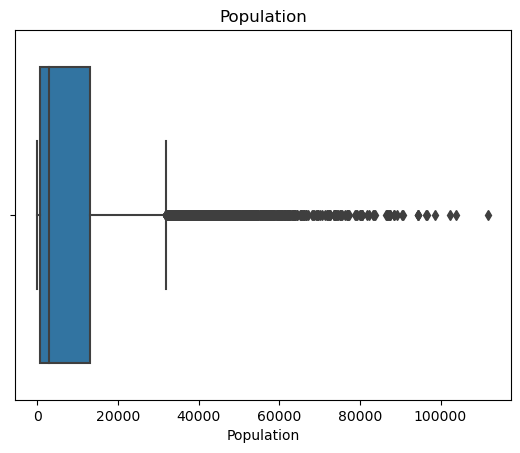

In [5]:
#Detect outliers in Population variable
population_boxplot = sns.boxplot(x="Population", data = df_churn).set_title("Population")

#Generate boxplot info for Population using boxplot_info function
boxplot_info(df_churn['Population'])

Q1: 0.0
Q3: 3.0
IQR: 3.0
Lower Whisker: -4.5
Upper Whisker: 7.5
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 401
Total number of Outliers: 401
Highest Outlier: 10
Lowest Outlier: 0


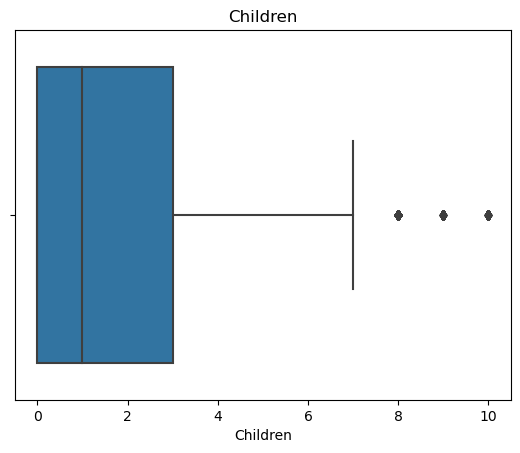

In [6]:
#Detect outliers in Children variable
population_boxplot = sns.boxplot(x="Children", data = df_churn).set_title("Children")

#Generate boxplot info for Children using boxplot_info function
boxplot_info(df_churn['Children'])

Q1: 35.0
Q3: 71.0
IQR: 36.0
Lower Whisker: -19.0
Upper Whisker: 125.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Highest Outlier: 89
Lowest Outlier: 18


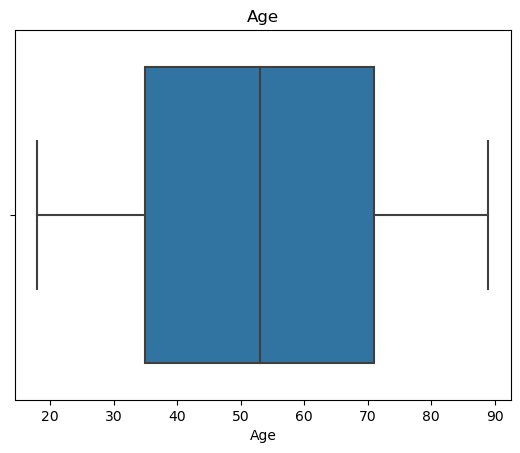

In [7]:
#Detect outliers in Age variable
population_boxplot = sns.boxplot(x="Age", data = df_churn).set_title("Age")

#Generate boxplot info for Population using boxplot_info function
boxplot_info(df_churn['Age'])

Q1: 19224.7175
Q3: 53246.17
IQR: 34021.4525
Lower Whisker: -31807.46125
Upper Whisker: 104278.34875
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 336
Total number of Outliers: 336
Highest Outlier: 258900.7
Lowest Outlier: 348.67


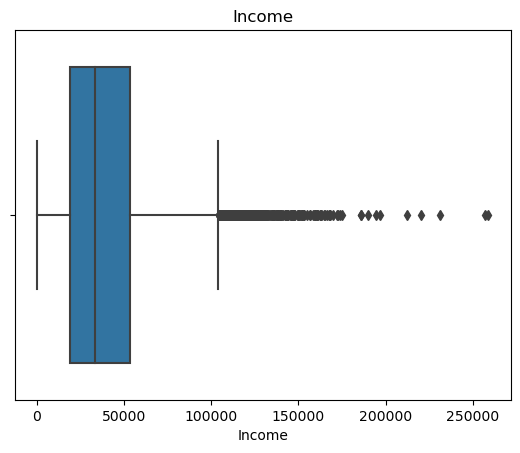

In [8]:
#Generate boxplot for Income variable
income_boxplot = sns.boxplot(x="Income", data = df_churn).set_title("Income")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Income'])

Q1: 8.018214
Q3: 11.969485
IQR: 3.951271
Lower Whisker: 2.0913075
Upper Whisker: 17.8963915
Number of outliers lower than boxplot minimum: 33
Number of outliers greater than boxplot maximum: 43
Total number of Outliers: 76
Highest Outlier: 21.20723
Lowest Outlier: 0.09974694


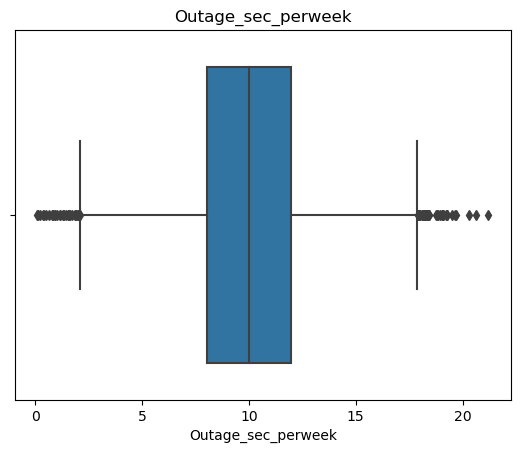

In [9]:
#Generate boxplot for Outage_sec_perweek variable
outage_boxplot = sns.boxplot(x="Outage_sec_perweek", data = df_churn).set_title("Outage_sec_perweek")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Outage_sec_perweek'])

Q1: 10.0
Q3: 14.0
IQR: 4.0
Lower Whisker: 4.0
Upper Whisker: 20.0
Number of outliers lower than boxplot minimum: 23
Number of outliers greater than boxplot maximum: 15
Total number of Outliers: 38
Highest Outlier: 23
Lowest Outlier: 1


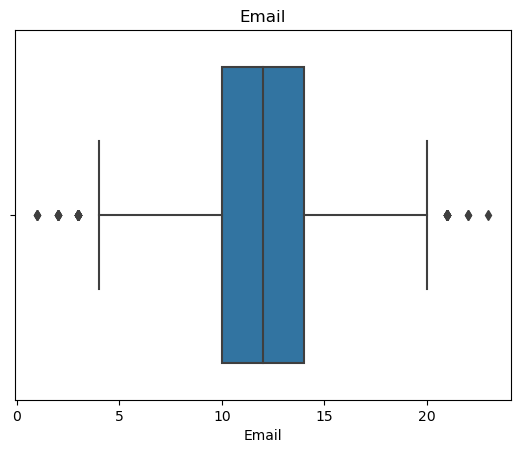

In [10]:
#Generate boxplot for Email variable
email_boxplot = sns.boxplot(x="Email", data = df_churn).set_title("Email")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Email'])

Q1: 0.0
Q3: 2.0
IQR: 2.0
Lower Whisker: -3.0
Upper Whisker: 5.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 8
Total number of Outliers: 8
Highest Outlier: 7
Lowest Outlier: 0


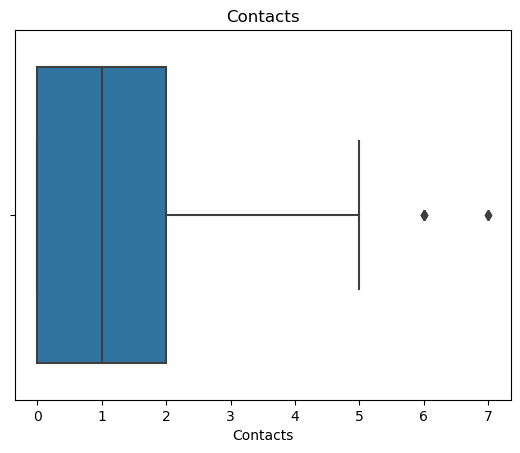

In [11]:
#Generate boxplot for Contacts variable
Contacts_boxplot = sns.boxplot(x="Contacts", data = df_churn).set_title("Contacts")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Contacts'])

Q1: 0.0
Q3: 1.0
IQR: 1.0
Lower Whisker: -1.5
Upper Whisker: 2.5
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 94
Total number of Outliers: 94
Highest Outlier: 6
Lowest Outlier: 0


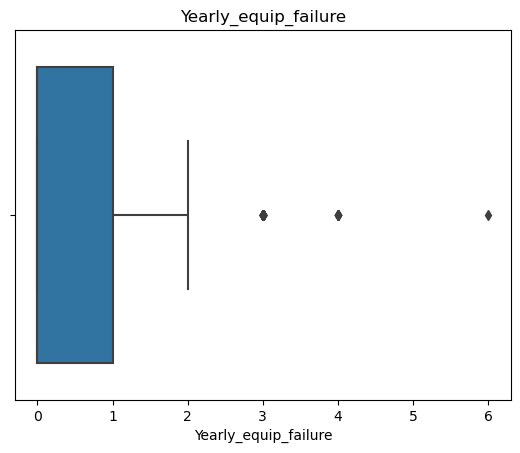

In [12]:
#Generate boxplot for Yearly_equip_failure variable
failure_boxplot = sns.boxplot(x="Yearly_equip_failure", data = df_churn).set_title("Yearly_equip_failure")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Yearly_equip_failure'])

Q1: 7.91769359175
Q3: 61.479795
IQR: 53.56210140825
Lower Whisker: -72.42545852062501
Upper Whisker: 141.822947112375
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Highest Outlier: 71.99928
Lowest Outlier: 1.00025934


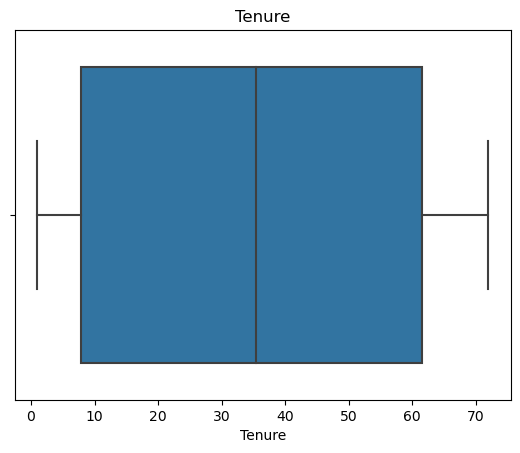

In [13]:
#Generate boxplot for Tenure variable
tenure_boxplot = sns.boxplot(x="Tenure", data = df_churn).set_title("Tenure")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Tenure'])

Q1: 139.979239
Q3: 200.734725
IQR: 60.75548599999999
Lower Whisker: 48.84601000000002
Upper Whisker: 291.867954
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Highest Outlier: 290.160419
Lowest Outlier: 79.97886


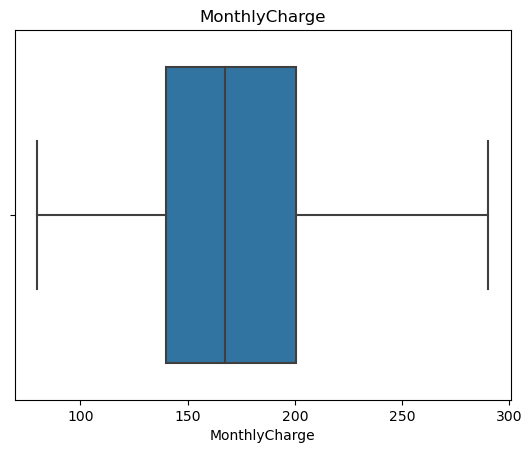

In [14]:
#Generate boxplot for MonthlyCharge variable
MonthlyCharge_boxplot = sns.boxplot(x="MonthlyCharge", data = df_churn).set_title("MonthlyCharge")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['MonthlyCharge'])

Q1: 1236.470827
Q3: 5586.1413695
IQR: 4349.6705425
Lower Whisker: -5288.03498675
Upper Whisker: 12110.64718325
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Highest Outlier: 7158.98153
Lowest Outlier: 155.5067148


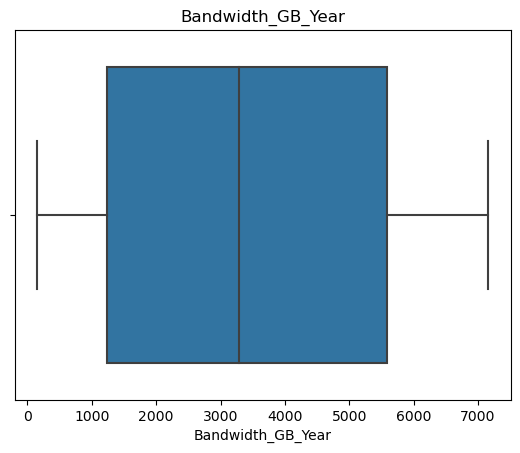

In [15]:
#Generate boxplot for Bandwidth_GB_Year variable
bandwidth_boxplot = sns.boxplot(x="Bandwidth_GB_Year", data = df_churn).set_title("Bandwidth_GB_Year")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Bandwidth_GB_Year'])

In [16]:
#Treat missing values in InternetService with mode imputation
df_churn['InternetService'] = df_churn['InternetService'].fillna(df_churn['InternetService'].mode()[0])

## C2. 

Please see the summary statistics for the dependent and independent variables below.  For the numerical variables, I used the "describe()" method to obtain basic information such as the mean and standard deviation.  For the categorical variables, I used the "value_counts()" method and multiplied by 100 to obtain percentages for category.  

<ul>
    <li>Outage_sec_perweek</li>
    <li>Contacts</li>
    <li>Yearly_equip_failure</li>
    <li>Tenure</li>
    <li>MonthlyCharge</li>
    <li>Contract</li>
    <li>InternetService</li>
    <li>TechSupport</li>
    <li>Item1</li>
    <li>Item2</li>
    <li>Item3</li>
    <li>Item4</li>
</ul>

In [17]:
#Describe dependent variable, Churn, using percentages for categories
df_churn['Churn'].value_counts(normalize = True) * 100 

No     73.5
Yes    26.5
Name: Churn, dtype: float64

In [18]:
#Describe independent variable, Contract, using percentages for categories
df_churn['Contract'].value_counts(normalize = True) * 100 

Month-to-month    54.56
Two Year          24.42
One year          21.02
Name: Contract, dtype: float64

In [19]:
#Describe independent variable, InternetService, using percentages for categories
df_churn['InternetService'].value_counts(normalize = True) * 100 

Fiber Optic    44.08
DSL            34.63
None           21.29
Name: InternetService, dtype: float64

In [20]:
#Describe independent variable, TechSupport, using percentages for categories
df_churn['TechSupport'].value_counts(normalize = True) * 100 

No     62.5
Yes    37.5
Name: TechSupport, dtype: float64

In [21]:
#Describe independent variable, Item1, using percentages for categories
df_churn['Item1'].value_counts(normalize = True) * 100 

3    34.48
4    33.58
2    13.93
5    13.59
1     2.24
6     1.99
7     0.19
Name: Item1, dtype: float64

In [22]:
#Describe independent variable, Item2, using percentages for categories
df_churn['Item2'].value_counts(normalize = True) * 100 

3    34.15
4    34.12
5    13.68
2    13.60
1     2.17
6     2.15
7     0.13
Name: Item2, dtype: float64

In [23]:
#Describe independent variable, Item3, using percentages for categories
df_churn['Item3'].value_counts(normalize = True) * 100 

3    34.35
4    34.10
2    14.24
5    13.13
6     2.03
1     2.02
7     0.12
8     0.01
Name: Item3, dtype: float64

In [24]:
#Describe independent variable, Item4, using percentages for categories
df_churn['Item4'].value_counts(normalize = True) * 100 

4    34.52
3    34.30
2    13.50
5    13.35
1     2.21
6     2.03
7     0.09
Name: Item4, dtype: float64

In [25]:
#Describe independent variable, Outage_sec_perweek
df_churn['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [26]:
#Describe independent variable, Contacts
df_churn['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

In [27]:
#Describe independent variable, Yearly_equip_failure
df_churn['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [28]:
#Describe independent variable, Tenure
df_churn['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [29]:
#Describe independent variable, MonthlyCharge
df_churn['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

## C3.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Please see univariate and bivariate visualizations of dependent and independent variables below.  I generated histograms for the univariate visualizations, boxplots for continuous bivariate visualizations, and crosstabulations for categorical bivariate visualizations.  The dependent variable "Churn" is included in all bivariate visualizations. 

Text(0.5, 1.0, 'Churn - Dependent Variable')

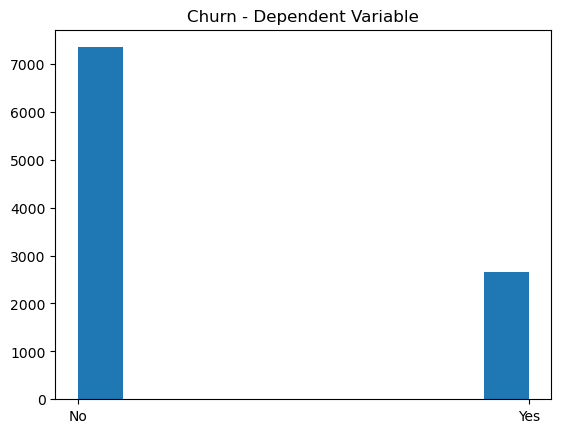

In [30]:
#Univariate distribution of dependent variable, Churn
plt.hist(df_churn['Churn'])
plt.title('Churn - Dependent Variable')

Text(0.5, 1.0, 'Outage_sec_perweek - Independent Variable')

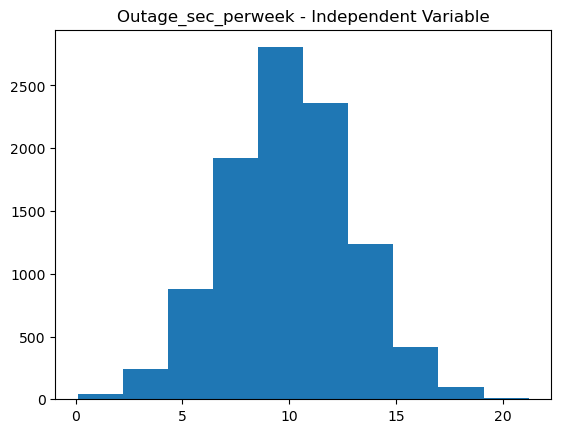

In [31]:
#Univariate distribution of dependent variable, Outage_sec_perweek
plt.hist(df_churn['Outage_sec_perweek'])
plt.title('Outage_sec_perweek - Independent Variable')

<Axes: xlabel='Churn', ylabel='Outage_sec_perweek'>

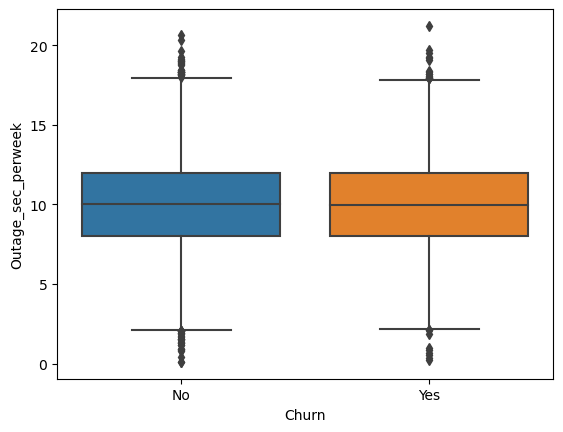

In [32]:
# Bivariate distribution between Outage_sec_perweek and Churn
sns.boxplot(x="Churn", y="Outage_sec_perweek", data = df_churn)

Text(0.5, 1.0, 'Contacts - Independent Variable')

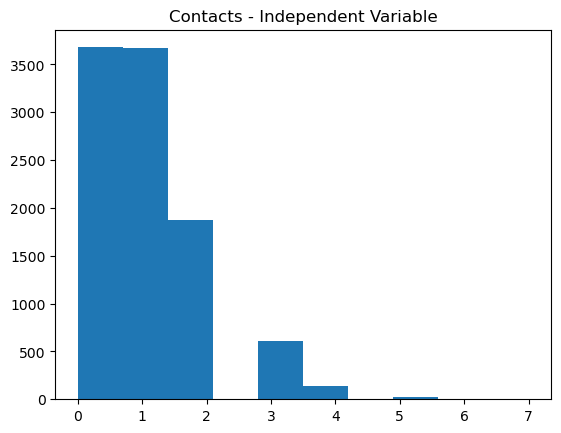

In [33]:
#Univariate distribution of Independent variable, Contacts
plt.hist(df_churn['Contacts'])
plt.title('Contacts - Independent Variable')

<Axes: xlabel='Churn', ylabel='Contacts'>

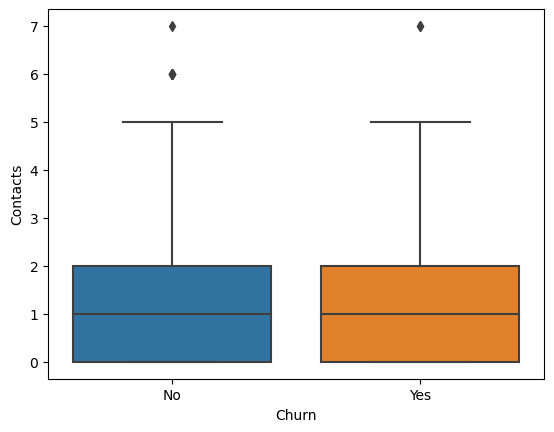

In [34]:
# Bivariate distribution between Contacts and Churn
sns.boxplot(x="Churn", y="Contacts", data = df_churn)

Text(0.5, 1.0, 'Yearly_equip_failure - Inependent Variable')

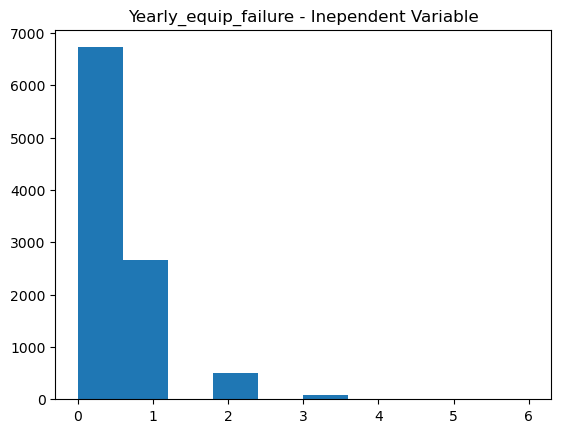

In [35]:
#Univariate distribution of independent variable, Yearly_equip_failure
plt.hist(df_churn['Yearly_equip_failure'])
plt.title('Yearly_equip_failure - Inependent Variable')

<Axes: xlabel='Churn', ylabel='Yearly_equip_failure'>

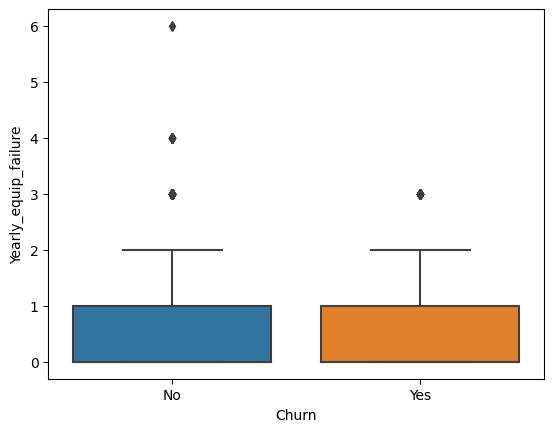

In [36]:
# Bivariate distribution between Yearly_equip_failure and Churn
sns.boxplot(x="Churn", y="Yearly_equip_failure", data = df_churn)

Text(0.5, 1.0, 'Tenure - Independent Variable')

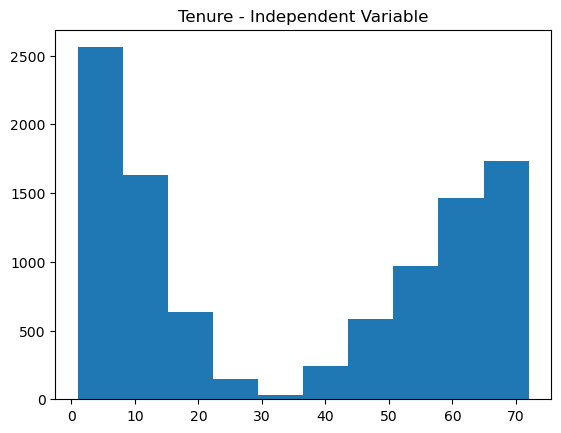

In [37]:
#Univariate distribution of independent variable, Tenure
plt.hist(df_churn['Tenure'])
plt.title('Tenure - Independent Variable')

<Axes: xlabel='Churn', ylabel='Tenure'>

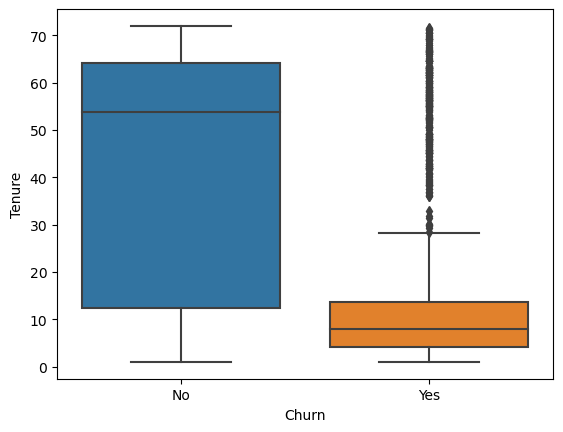

In [38]:
# Bivariate distribution between Tenure and Churn
sns.boxplot(x="Churn", y="Tenure", data = df_churn)

Text(0.5, 1.0, 'MonthlyCharge - Independent Variable')

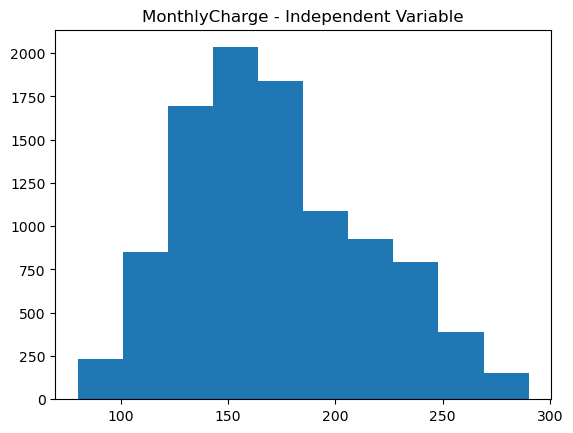

In [39]:
#Univariate distribution of independent variable, MonthlyCharge
plt.hist(df_churn['MonthlyCharge'])
plt.title('MonthlyCharge - Independent Variable')

<Axes: xlabel='Churn', ylabel='MonthlyCharge'>

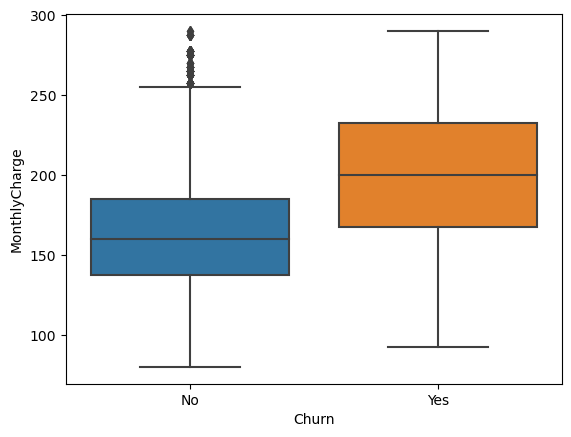

In [40]:
# Bivariate distribution between MonthlyCharge and Churn
sns.boxplot(x="Churn", y="MonthlyCharge", data = df_churn)

Text(0.5, 1.0, 'Contract - Independent Variable')

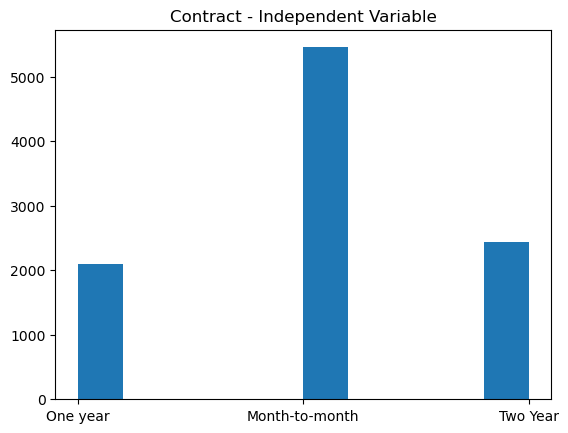

In [41]:
#Univariate distribution of independent variable, Contract
plt.hist(df_churn['Contract'])
plt.title('Contract - Independent Variable')

In [42]:
# Bivariate visualization for Contract and Churn
pd.crosstab(df_churn["Contract"], df_churn["Churn"])

Churn,No,Yes
Contract,,
Month-to-month,3422,2034
One year,1795,307
Two Year,2133,309


Text(0.5, 1.0, 'InternetService - Independent Variable')

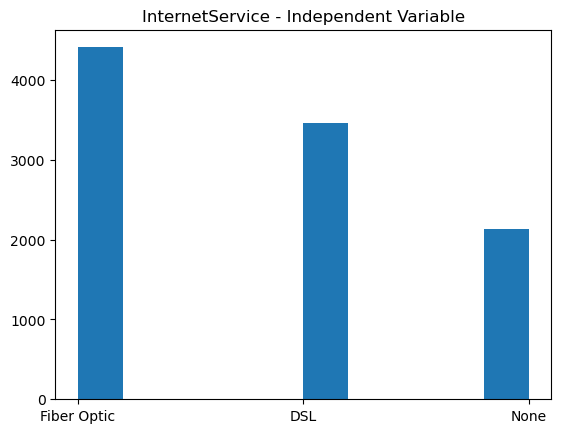

In [43]:
#Univariate distribution of independent variable, InternetService
plt.hist(df_churn['InternetService'])
plt.title('InternetService - Independent Variable')

In [44]:
# Bivariate distribution for InternetService and Churn
pd.crosstab(df_churn["InternetService"], df_churn["Churn"])

Churn,No,Yes
InternetService,,
DSL,2349,1114
Fiber Optic,3368,1040
None,1633,496


Text(0.5, 1.0, 'TechSupport - Independent Variable')

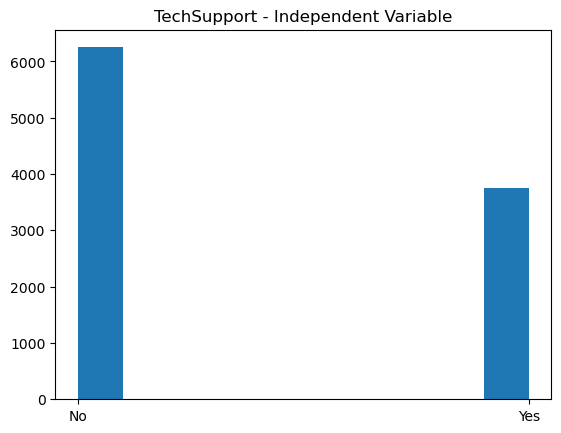

In [45]:
#Univariate distribution of independent variable, TechSupport
plt.hist(df_churn['TechSupport'])
plt.title('TechSupport - Independent Variable')

In [46]:
# Bivariate distribution for TechSupport and Churn
pd.crosstab(df_churn["TechSupport"], df_churn["Churn"])

Churn,No,Yes
TechSupport,,
No,4634,1616
Yes,2716,1034


Text(0.5, 1.0, 'Item1 - Independent Variable')

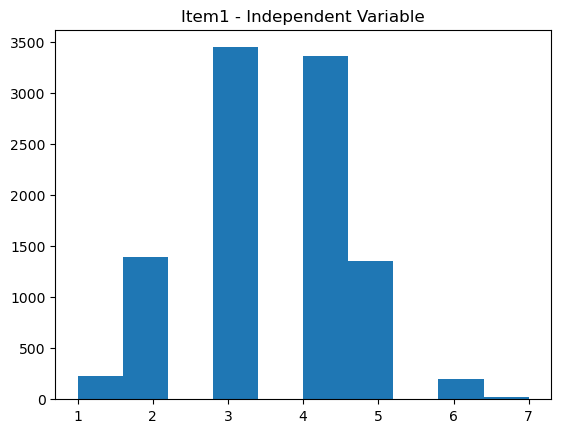

In [47]:
#Univariate distribution of independent variable, Item1
plt.hist(df_churn['Item1'])
plt.title('Item1 - Independent Variable')

In [48]:
# Bivariate distribution for Item1 and Churn
pd.crosstab(df_churn["Item1"], df_churn["Churn"])

Churn,No,Yes
Item1,,
1,158,66
2,1002,391
3,2562,886
4,2473,885
5,994,365
6,146,53
7,15,4


Text(0.5, 1.0, 'Item2 - Independent Variable')

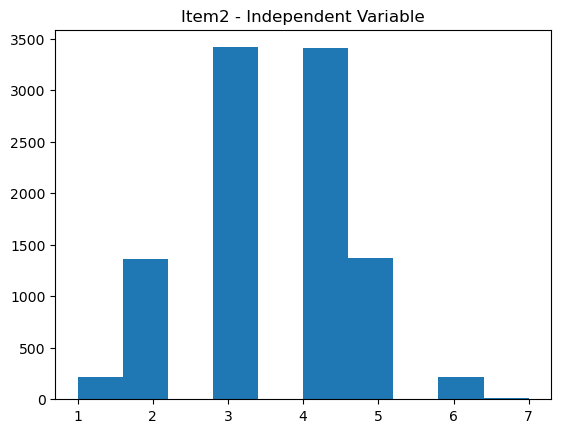

In [49]:
#Univariate distribution of independent variable, Item2
plt.hist(df_churn['Item2'])
plt.title('Item2 - Independent Variable')

In [50]:
# Bivariate distribution for Item2 and Churn
pd.crosstab(df_churn["Item2"], df_churn["Churn"])

Churn,No,Yes
Item2,,
1,160,57
2,973,387
3,2519,896
4,2507,905
5,1025,343
6,155,60
7,11,2


Text(0.5, 1.0, 'Item3 - Independent Variable')

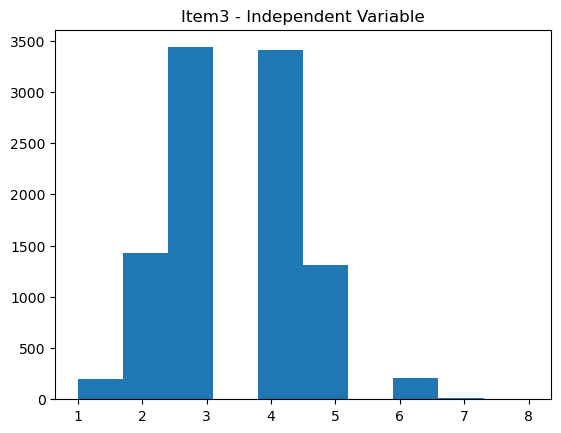

In [51]:
#Univariate distribution of independent variable, Item3
plt.hist(df_churn['Item3'])
plt.title('Item3 - Independent Variable')

In [52]:
# Bivariate distribution for Item3 and Churn
pd.crosstab(df_churn["Item3"], df_churn["Churn"])

Churn,No,Yes
Item3,,
1,146,56
2,1017,407
3,2540,895
4,2527,883
5,960,353
6,149,54
7,10,2
8,1,0


Text(0.5, 1.0, 'Item4 - Independent Variable')

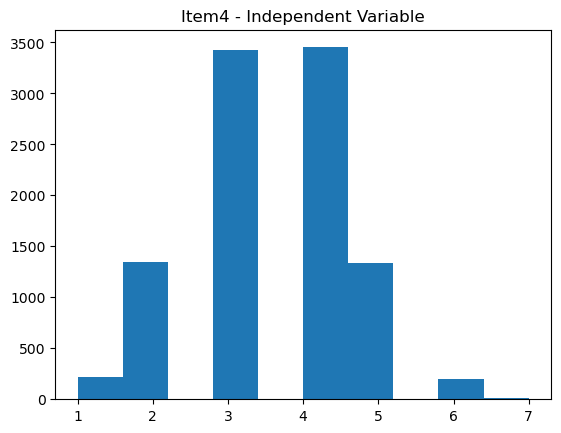

In [53]:
#Univariate distribution of independent variable, Item4
plt.hist(df_churn['Item4'])
plt.title('Item4 - Independent Variable')

In [54]:
# Bivariate distribution for Item4 and Churn
pd.crosstab(df_churn["Item4"], df_churn["Churn"])

Churn,No,Yes
Item4,,
1,162,59
2,990,360
3,2524,906
4,2523,929
5,998,337
6,145,58
7,8,1


## C4.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After treating missing values and outliers, I decided to transform df_churn by re-expressing some of the categorical variables.  The goal of the transformation was to prepare the selected variables for use in my logistic regression model later on.  This regression will allow us to analyze the relationship between the independent variables and the dependent variable "Churn".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I decided to re-express my dependent variable "Churn" and my independent variable "TechSupport" using ordinal encoding.  To do this, I created a unique dictionary for both.  Each dictionary assigns a value of 1 to "Yes" and 0 to "No".  I then used the pandas "replace()" method and passed the unique dictionary as a parameter.  This replaced the original "Yes" and "No" with the numerical values contained in the dictionaries.  To confirm that the values had been changed, I printed the unique values of the "Churn" and "TechSupport" variables.  The resulting output for each variable showed 1 and 0.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I chose to re-express the variable "InternetService" using one-hot encoding.  This was because the two categories "DSL" and "Fiber Optic" represent labels rather than a particular order.  To do this, I used the "get_dummies()" method from the pandas library.  This generated a new dataframe containing the dummy variables "dummy_DSL" and "dummy_Fiber Optic".  Because the values of the resulting dataframe are "True" and "False" I used the "astype" method to convert them to 1 and 0.  This was done to make the values compatible with the logistic regression model I plan to develop later on.  Before adding the dummy variables to "df_churn", I chose to exclude "dummy_DSL", which will serve as the base category for "InternetService".  It is recommended to exclude one of the dummy variables to avoid redundancy (Shmueli, 2015).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I also re-expressed "Contract" using one-hot encoding.  I chose this method because the values "Month-to-month", "One year" and "Two Year" also represent labels rather than a particular order.  To do this, I used the "get_dummies()" method from the pandas library.  This generated a new dataframe containing the dummy variables "dummy_Month-to-month", "dummy_One year", and "dummy_Two Year".  Because the values of the resulting dataframe are "True" and "False" I used the "astype" method to convert them to 1 and 0.  This was done to make the values compatible with the logistic regression model I plan to develop later on.  Before adding the dummy variables to "df_churn", I chose to exclude "dummy_Month-to-month", which will serve as the base category for "Contract". 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lastly, I chose to rename a few of the categorical variables that will be used in the regression model.  "Item1", "Item2", "Item3", and "Item4" were changed to "Responses","Fixes","Replacements", and "Reliability".  This was done to make the variables easier to interpret.  The final step I took was to change the data types of all variables to float so they would be compatible with logistic regression.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that the variables have been transformed, we are ready to proceed with the initial regression model. Please see the annotated code below, which was used to transform the selected categorical variables.

In [55]:
#Re-express dependent variable, Churn, as numeric 

#Find unique values of variable
print(df_churn["Churn"].unique())

#Create dictionary to store numeric values for variable
dict_churn = {"Churn":
                    {"Yes":1,
                     "No":0
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_churn, inplace=True)

#Change variable to float for compatability with logistic regression
df_churn["Churn"] = df_churn["Churn"].astype(float)

#Confirm categorical values have been replaced
print(df_churn["Churn"].unique())

['No' 'Yes']
[0. 1.]


In [56]:
#Re-express Contract as numeric using one-hot encoding

#Use pd.get_dummies to turn Contract variable into 3 dummy variables
df_contract = pd.get_dummies(df_churn["Contract"], prefix="dummy")

#Change data type of dummy variables from boolean to float
df_contract = df_contract.astype(float)

#Join dummy_One year and dummy_Two Year to df_churn.  Use dummy_Month-to-month as base category.
df_churn = df_churn.join(df_contract[["dummy_One year", "dummy_Two Year"]])

In [57]:
#Re-express InternetService as numeric using one-hot encoding

#Use pd.get_dummies to turn InternetService variable into 2 dummy variable
df_internet = pd.get_dummies(df_churn["InternetService"], prefix="dummy")

#Change data type of dummy variables from boolean to float
df_internet = df_internet.astype(float)

#Join dummy_Fiber Optic to df_churn
df_churn = df_churn.join(df_internet["dummy_Fiber Optic"])

In [58]:
#Re-express TechSupport as numeric using ordinal encoding

#Find unique values of  variable
print(df_churn["TechSupport"].unique())

#Create dictionary to store numeric values for variable
dict_techsupport = {"TechSupport":
                    {"Yes":1,
                     "No":0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_techsupport, inplace=True)

#Confirm categorical values have been replaced
print(df_churn["TechSupport"].unique())

['No' 'Yes']
[0 1]


In [59]:
#Rename Item columns in df_churn 
df_churn = df_churn.rename(columns = {'Item1':'Responses','Item2':'Fixes','Item3':'Replacements','Item4':'Reliability'})

## C5.

Please see the attached csv file containing the prepared data.

In [60]:
df_churn.to_csv('churn_prepared.csv')

## D1. 

To build the multiple logistic regression model, I first assigned the independent variables to a dataframe called "X" and added a constant using the "sm.add_constant()" method. The dependent variable, "Churn", was added to a dataframe called "y".  I then used the "Logit()" method from statsmodels.api and passed the dataframes as parameters. To generate a summary of the model, I used the "summary2()" method.

In [63]:
#Create initial logistic regression model [In-text citation: (LaRose et al, 2019)]
X = pd.DataFrame(df_churn[["Outage_sec_perweek","Contacts","Yearly_equip_failure","Tenure","MonthlyCharge","dummy_One year","dummy_Two Year","dummy_Fiber Optic","TechSupport","Responses","Fixes","Replacements","Reliability"]])
X = sm.add_constant(X)

y = pd.DataFrame(df_churn[["Churn"]])

mdl_initial = sm.Logit(y, X).fit()

mdl_initial.summary2()

PatsyError: model is missing required outcome variables

## D2. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that the initial model has been built, I plan to reduce the amount of features using a few different methods.  This step is imperative because having too many explanatory variables can make a regression model unreliable.  This will help us to identify which factors are indeed the most responsible in predicting customer churn.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The first method I will use is to check for multicollinearity. This occurs when there is a high degree of correlation between two or more independent variables.  This poses a problem because it can lead to inaccurate regression coefficients. To do this, I will calculate the variance inflation factor (VIF) for all features in my initial model.  The first step will be to assign the features to a new dataframe and use the "variance_inflation_factor()" method to calculate the VIF for each feature.  Typically, if a predictor has a VIF of 10 or greater, there is a high level of correlation with another predictor (LaRose et al, 2019).  I will remove the variable with the highest VIF greater than 10 and recalculate VIF for the remaining variables.  This process will be repeated until there are no remaining variable with a VIF greater than 10. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After removing variables with high VIF, I will use backward stepwise regression to eliminate variables that are not statistically significant.  I will start off by removing the variable with the largest p-value that is greater than .05.  Then I will run a new iteration of the model using the "Logit()" method and recalculate the p-values for each variable.  This process will be repeated until all of the remaining independent variables have a p-value less than 0.05.  These variables will be included in the reduced logistic regression model.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lastly, I will compare the pseudo R-squared of the initial and reduced models.  Unlike the R-squared used in linear regression, a pseudo R-squared provides no value unless it is compared to another pseudo R-squared value.  Pseudo r-squared values range from 0 to 1, with higher values indicating a better fit (UCLA Statistical Methods and Data Analytics).

## D3. 

Please see the annotated model evaluation process below.  This process follows the steps outlined in section D2.  Please see the output of each model iteration below.  The reduced logistic regression model is located at the end of this section.

#### Calculate VIF for all independent variables

In [ ]:
#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Outage_sec_perweek","Contacts","Yearly_equip_failure","Tenure","MonthlyCharge","dummy_One year","dummy_Two Year","dummy_Fiber Optic","TechSupport","Responses","Fixes","Replacements","Reliability"]])

#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

#### Remove Reponses (VIF = 25.102549) and recalculate VIF

In [ ]:
#Assign independent variables to dataframe X, remove Responses 
X = pd.DataFrame(df_churn[["Outage_sec_perweek","Contacts","Yearly_equip_failure","Tenure","MonthlyCharge","dummy_One year","dummy_Two Year","dummy_Fiber Optic","TechSupport","Fixes","Replacements","Reliability"]])

#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

#### Remove Fixes (VIF = 16.150396) and recalculate VIF

In [ ]:
#Assign independent variables to dataframe X, remove Responses 
X = pd.DataFrame(df_churn[["Outage_sec_perweek","Contacts","Yearly_equip_failure","Tenure","MonthlyCharge","dummy_One year","dummy_Two Year","dummy_Fiber Optic","TechSupport","Replacements","Reliability"]])

#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

#### Remove MonthlyCharge (VIF = 13.131709) and recalculate VIF

In [ ]:
#Assign independent variables to dataframe X, remove Responses 
X = pd.DataFrame(df_churn[["Outage_sec_perweek","Contacts","Yearly_equip_failure","Tenure","dummy_One year","dummy_Two Year","dummy_Fiber Optic","TechSupport","Replacements","Reliability"]])

#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

#### Remove Responses, Fixes, and MonthlyCharge (VIF > 10) from initial model.  Perform new regression to check for features with largest p-value greater than 0.05

In [ ]:
#Iterate on logistic regression model, remove Responses, Fixes, and MonthlyCharge (VIF > 10)
X = pd.DataFrame(df_churn[["Outage_sec_perweek","Contacts","Yearly_equip_failure","Tenure","dummy_One year","dummy_Two Year","dummy_Fiber Optic","TechSupport","Replacements","Reliability"]])
X = sm.add_constant(X)

y = pd.DataFrame(df_churn[["Churn"]])

mdl_initial = sm.Logit(y, X).fit()

mdl_initial.summary2()

#### Remove Outage_sec_perweek (p > 0.05) and check p-values again 

In [ ]:
#Iterate on logistic regression model, remove Outage_sec_perweek (p-value > 0.05)
X = pd.DataFrame(df_churn[["Contacts","Yearly_equip_failure","Tenure","dummy_One year","dummy_Two Year","dummy_Fiber Optic","TechSupport","Replacements","Reliability"]])
X = sm.add_constant(X)

y = pd.DataFrame(df_churn[["Churn"]])

mdl_initial = sm.Logit(y, X).fit()

mdl_initial.summary2()

#### Remove Replacements (p > 0.05) and check p-values again

In [ ]:
#Iterate on logistic regression model, remove Replacements (p-value > 0.05)
X = pd.DataFrame(df_churn[["Contacts","Yearly_equip_failure","Tenure","dummy_One year","dummy_Two Year","dummy_Fiber Optic","TechSupport","Reliability"]])
X = sm.add_constant(X)

y = pd.DataFrame(df_churn[["Churn"]])

mdl_initial = sm.Logit(y, X).fit()

mdl_initial.summary2()

#### Remove Yearly_equip_failure (p > 0.05) and check p-values again

In [ ]:
#Iterate on logistic regression model, remove Yearly_equip_failure (p-value > 0.05)
X = pd.DataFrame(df_churn[["Contacts","Tenure","dummy_One year","dummy_Two Year","dummy_Fiber Optic","TechSupport","Reliability"]])
X = sm.add_constant(X)

y = pd.DataFrame(df_churn[["Churn"]])

mdl_initial = sm.Logit(y, X).fit()

mdl_initial.summary2()

#### Remove Reliability (p > 0.05) and check p-values again 

In [ ]:
#Iterate on logistic regression model, remove Yearly_equip_failure (p-value > 0.05)
X = pd.DataFrame(df_churn[["Contacts","Tenure","dummy_One year","dummy_Two Year","dummy_Fiber Optic","TechSupport"]])
X = sm.add_constant(X)

y = pd.DataFrame(df_churn[["Churn"]])

mdl_initial = sm.Logit(y, X).fit()

mdl_initial.summary2()

#### Remove Contacts (p > 0.05) and check p-values

In [ ]:
#Iterate on logistic regression model, remove Contacts (p-value > 0.05)
X = pd.DataFrame(df_churn[["Tenure","dummy_One year","dummy_Two Year","dummy_Fiber Optic","TechSupport"]])
X = sm.add_constant(X)

y = pd.DataFrame(df_churn[["Churn"]])

mdl_initial = sm.Logit(y, X).fit()

mdl_initial.summary2()

#### Remove TechSupport(p > 0.05) and check p-values

In [ ]:
#Iterate on logistic regression model, remove TechSupport (p-value > 0.05)
X = pd.DataFrame(df_churn[["Tenure","dummy_One year","dummy_Two Year","dummy_Fiber Optic"]])
X = sm.add_constant(X)

y = pd.DataFrame(df_churn[["Churn"]])

mdl_initial = sm.Logit(y, X).fit()

mdl_initial.summary2()

#### Reduced logistic regression model 

In [ ]:
#Iterate on logistic regression model, remove TechSupport (p-value > 0.05)
X = pd.DataFrame(df_churn[["Tenure","dummy_One year","dummy_Two Year","dummy_Fiber Optic"]])
X = sm.add_constant(X)

y = pd.DataFrame(df_churn[["Churn"]])

mdl_reduced = sm.Logit(y, X).fit()

mdl_reduced.summary2()

In [ ]:
print(df_churn.Churn.dtype)

## E1.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After checking the variance inflation factor and p-value of each variable, I was able to iterate on my initial model several times until I was left with a complete reduced model.  The VIF calculations indicated that "Responses", "Fixes", and "MonthlyCharge" needed to be removed due to high correlation with other predictors.  Additionally, I was left with only statistically significant variables because I eliminated all independent variables with p-values greater than 0.05.  The final model contains 4 independent variables from the 15 (including dummy variables) in the initial model.  These variables are "Tenure", "dummy_One year", "dummy_Two Year", and "dummy_Fiber Optic". 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To compare these two models, I decided to review their pseudo R-squared values.  As mentioned previously, a single pseudo R-squared value means nothing on its own.  However, a comparison of the values between the two models will inform us which one is superior.  We can see from calculations above that the initial model has a pseudo R-squared of 0.573.  The reduced model has a pseudo R-squared of 0.329.  Based on this information, we can conclude that the initial model has a better fit than the reduced model.  

## E2. 

In [ ]:
y_pred = mdl_reduced.predict(X)

In [ ]:
print(y_pred)

In [ ]:
#y_pred = np.round(y_pred)

In [ ]:
confusion_matrix(y, y_pred)

In [ ]:
accuracy_score(y, np.round(y_pred))

## H. Sources

UCLA Statistical Consulting Group. (n.d.). FAQ: What are Pseudo R-Squareds?. UCLA Statistical Methods and Analytics. https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-what-are-pseudo-r-squareds/

https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/